In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, f1_score


In [49]:
df_for_logReg_model = pd.read_csv(os.getcwd()+ os.sep+"df_for_logReg_model.csv") #importing df
df_for_logReg_model

,GP,PPG,FGM,FGA,FG%,3PM,3P%,ORB,DRB,APG,SPG,TOV,is_Champion
0,4,89.3,30.5,61.5,0.496,9.3,0.389,13.0,24.3,20.8,9.5,19.3,0.0
1,6,85.5,30.5,66.7,0.458,5.8,0.307,13.3,29.5,16.3,9.0,15.8,0.0
2,4,84.8,33.3,66.0,0.504,7.3,0.387,10.5,20.0,22.8,11.8,18.0,0.0
3,6,83.2,32.3,73.2,0.442,4.7,0.243,16.2,26.0,17.2,11.2,14.7,0.0
4,6,79.3,29.8,65.2,0.458,6.0,0.303,12.7,24.0,20.2,10.3,19.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11552,47,74.9,27.0,66.3,0.406,6.1,0.298,11.8,24.1,14.0,8.6,15.2,0.0
11553,47,74.8,26.5,63.0,0.421,7.6,0.312,8.3,21.7,17.5,7.1,15.0,0.0
11554,44,72.7,25.9,64.3,0.402,6.2,0.268,10.4,22.7,13.8,8.4,16.2,0.0
11555,44,72.7,26.1,64.5,0.405,7.0,0.280,6.7,19.6,14.9,8.4,15.0,0.0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_for_logReg_model.drop('is_Champion', axis=1), df_for_logReg_model.is_Champion, random_state=0)

In [51]:
X_train.describe()

,GP,PPG,FGM,FGA,FG%,3PM,3P%,ORB,DRB,APG,SPG,TOV
count,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000
mean,33.709242,81.816892,29.796712,65.736841,0.453115,7.616972,0.337525,9.647917,24.322453,16.682808,7.422753,14.018495
std,20.221304,10.458149,4.345103,8.221231,0.030306,2.013701,0.038726,2.111900,3.479982,3.755340,1.578859,2.129367
min,1.000000,35.000000,13.500000,47.000000,0.245000,0.100000,0.056000,0.000000,9.000000,4.000000,1.000000,1.000000
25%,22.000000,75.400000,27.100000,60.600000,0.436000,6.600000,0.317000,8.400000,22.100000,14.000000,6.400000,12.700000
50%,32.000000,79.600000,28.800000,63.300000,0.454000,7.700000,0.340000,9.400000,23.700000,16.300000,7.300000,13.800000
75%,39.500000,85.000000,31.000000,67.500000,0.472000,8.800000,0.360000,10.700000,25.800000,18.900000,8.200000,15.100000
max,82.000000,126.500000,48.500000,108.100000,0.650000,16.700000,0.609000,21.500000,40.400000,30.400000,18.000000,39.500000


In [52]:
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
acc

0.9370242214532872

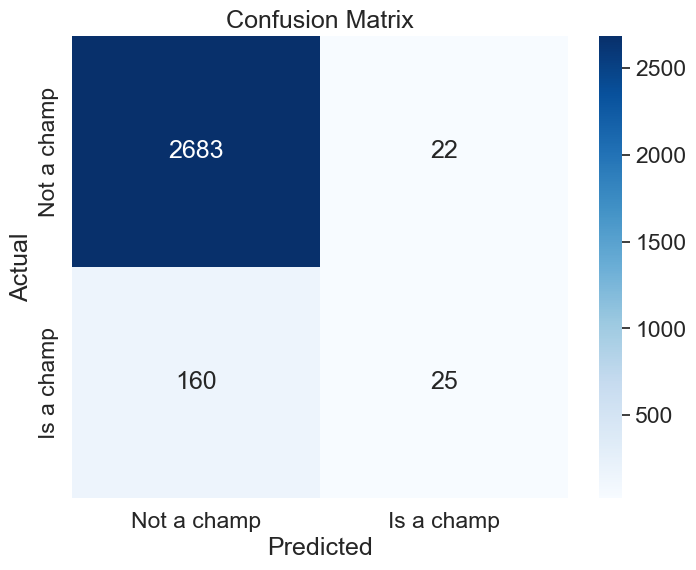

In [53]:
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Customize tick labels (if needed)
class_labels = ['Not a champ', 'Is a champ']  # Replace with your actual class labels
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Display the plot
plt.show()


In [54]:
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred)

print(f"accuracy is {acc}")
print(f"precision is {precision}")
print(f"recall is {recall}")
print(f"f1 is {f1}")



accuracy is 0.9370242214532872
precision is 0.5319148936170213
recall is 0.13513513513513514
f1 is 0.2155172413793104


In [55]:
'''The evaluation of the model is not so good, the accuracy seems too high, while the f1 is not high enough. We will try to improve our model.'''

'The evaluation of the model is not so good, the accuracy seems too high, while the f1 is not high enough. We will try to improve our model.'

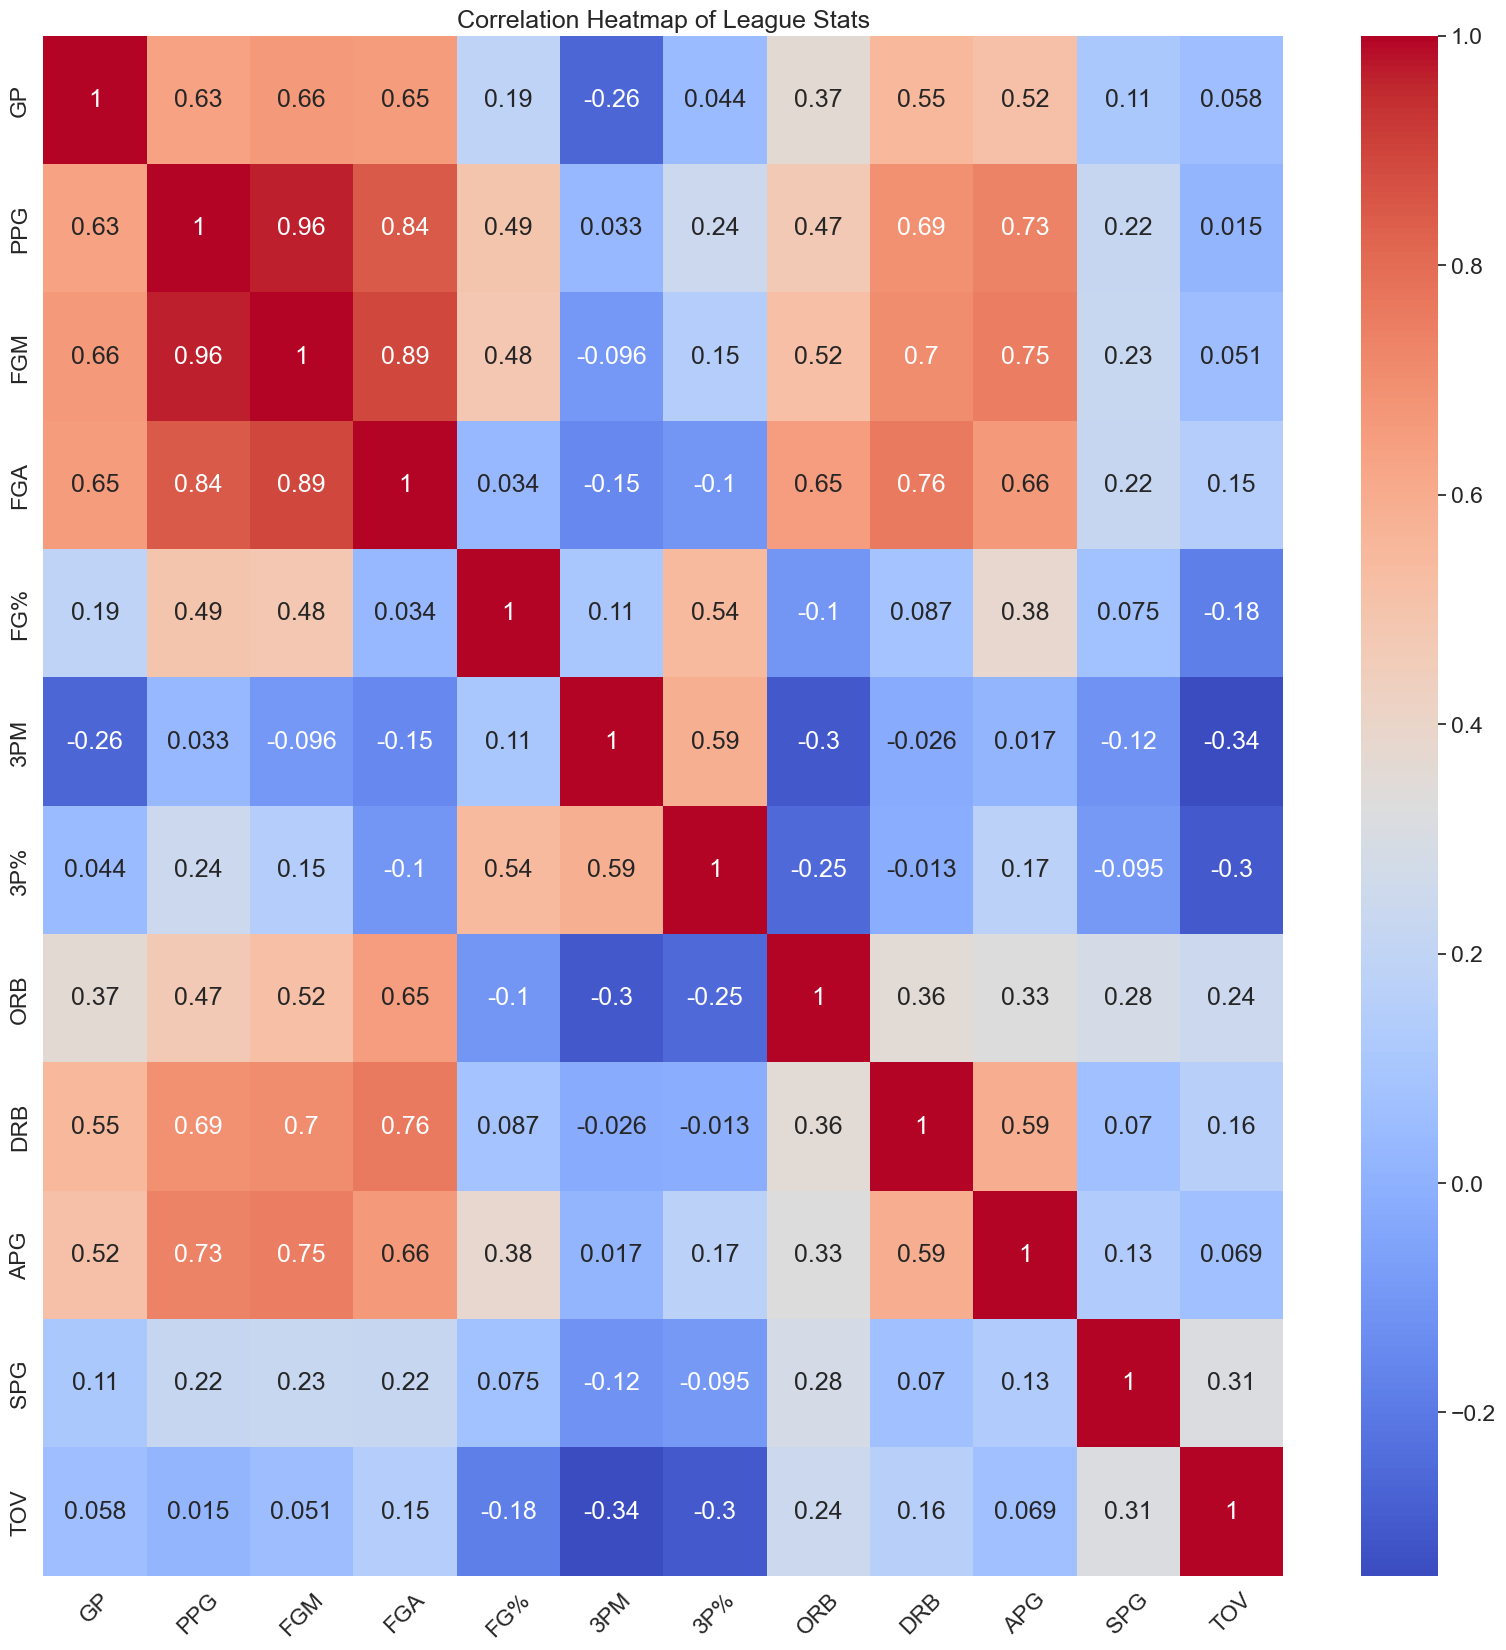

In [59]:
# Set the figure size and font size for the heatmap
plt.figure(figsize=(20, 20))  
sns.set(font_scale=1.5)  

corr_matrix = df_for_logReg_model.drop(["is_Champion"], axis=1).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap of League Stats')

plt.xticks(rotation=45)

plt.show()

In [81]:
#multiplying high correlated fields to improve model
for i in corr_matrix.index:
    for j in corr_matrix.columns:
        if i != j and corr_matrix.loc[i, j] >= 0.7:
            df_for_logReg_model[f"{i}*{j}"] = df_for_logReg_model[i]*df_for_logReg_model[j]
            print(f"{i} and {j}")    

PPG and FGM
PPG and FGA
PPG and APG
FGM and PPG
FGM and FGA
FGM and DRB
FGM and APG
FGA and PPG
FGA and FGM
FGA and DRB
DRB and FGM
DRB and FGA
APG and PPG
APG and FGM


In [82]:
df_for_logReg_model.describe()

,GP,PPG,FGM,FGA,FG%,3PM,3P%,ORB,DRB,APG,...,FGM+FGA,FGM+DRB,FGM+APG,FGA+PPG,FGA+FGM,FGA+DRB,DRB+FGM,DRB+FGA,APG+PPG,APG+FGM
count,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,...,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000
mean,33.863719,81.844717,29.809544,65.735667,0.453336,7.624332,0.337708,9.649944,24.311335,16.672943,...,95.545211,54.120879,46.482487,147.580384,95.545211,90.047002,54.120879,90.047002,98.517660,46.482487
std,20.204459,10.370892,4.315671,8.194992,0.030015,2.007743,0.038490,2.092284,3.472485,3.756519,...,12.197218,7.191318,7.559908,17.840103,12.197218,11.064388,7.191318,11.064388,13.374082,7.559908
min,1.000000,35.000000,13.500000,47.000000,0.245000,0.100000,0.056000,0.000000,9.000000,4.000000,...,67.000000,31.000000,22.000000,90.000000,67.000000,57.000000,31.000000,57.000000,43.500000,22.000000
25%,22.000000,75.500000,27.200000,60.600000,0.437000,6.600000,0.318000,8.400000,22.100000,14.000000,...,88.000000,49.600000,41.500000,136.700000,88.000000,83.000000,49.600000,83.000000,90.000000,41.500000
50%,32.000000,79.600000,28.800000,63.300000,0.455000,7.700000,0.340000,9.400000,23.700000,16.300000,...,92.000000,52.400000,45.100000,142.700000,92.000000,86.800000,52.400000,86.800000,95.800000,45.100000
75%,40.000000,85.100000,31.000000,67.500000,0.472000,8.800000,0.360000,10.700000,25.800000,18.900000,...,98.000000,56.100000,49.500000,151.100000,98.000000,92.700000,56.100000,92.700000,103.300000,49.500000
max,82.000000,126.500000,48.500000,108.100000,0.650000,17.000000,0.609000,21.500000,42.200000,31.400000,...,155.700000,85.500000,79.600000,228.000000,155.700000,139.000000,85.500000,139.000000,154.200000,79.600000


In [83]:
'''model improvement'''

'model improvement'

In [84]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_for_logReg_model.drop('is_Champion', axis=1), df_for_logReg_model.is_Champion, random_state=0)
X_train_new.describe()

,GP,PPG,FGM,FGA,FG%,3PM,3P%,ORB,DRB,APG,...,FGM+FGA,FGM+DRB,FGM+APG,FGA+PPG,FGA+FGM,FGA+DRB,DRB+FGM,DRB+FGA,APG+PPG,APG+FGM
count,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,...,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000
mean,33.709242,81.816892,29.796712,65.736841,0.453115,7.616972,0.337525,9.647917,24.322453,16.682808,...,95.533553,54.119165,46.479520,147.553733,95.533553,90.059294,54.119165,90.059294,98.499700,46.479520
std,20.221304,10.458149,4.345103,8.221231,0.030306,2.013701,0.038726,2.111900,3.479982,3.755340,...,12.249722,7.220401,7.594123,17.953090,12.249722,11.092796,7.220401,11.092796,13.469759,7.594123
min,1.000000,35.000000,13.500000,47.000000,0.245000,0.100000,0.056000,0.000000,9.000000,4.000000,...,67.000000,31.000000,22.000000,90.000000,67.000000,57.000000,31.000000,57.000000,43.500000,22.000000
25%,22.000000,75.400000,27.100000,60.600000,0.436000,6.600000,0.317000,8.400000,22.100000,14.000000,...,88.000000,49.600000,41.500000,136.700000,88.000000,83.000000,49.600000,83.000000,90.000000,41.500000
50%,32.000000,79.600000,28.800000,63.300000,0.454000,7.700000,0.340000,9.400000,23.700000,16.300000,...,92.000000,52.300000,45.100000,142.700000,92.000000,86.800000,52.300000,86.800000,95.700000,45.100000
75%,39.500000,85.000000,31.000000,67.500000,0.472000,8.800000,0.360000,10.700000,25.800000,18.900000,...,98.000000,56.100000,49.400000,150.950000,98.000000,92.700000,56.100000,92.700000,103.250000,49.400000
max,82.000000,126.500000,48.500000,108.100000,0.650000,16.700000,0.609000,21.500000,40.400000,30.400000,...,155.700000,83.800000,76.900000,228.000000,155.700000,139.000000,83.800000,139.000000,154.200000,76.900000


In [85]:

clf.fit(X_train_new, y_train_new)
acc = clf.score(X_test_new, y_test_new)
acc

0.9377162629757786

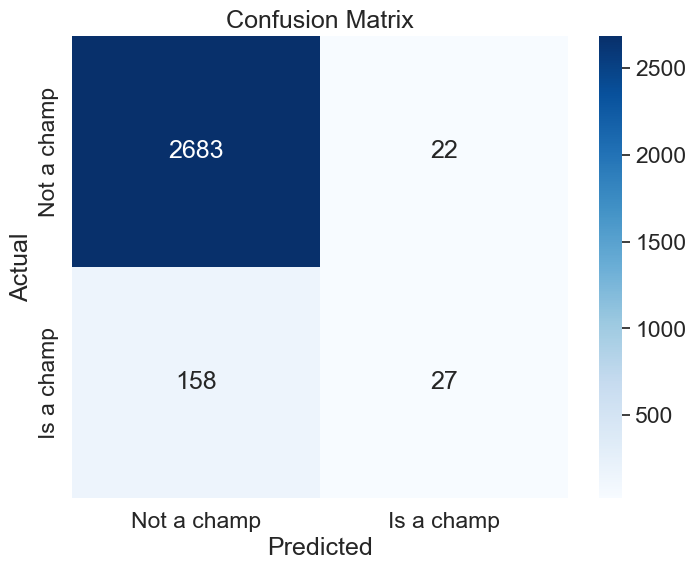

In [86]:
y_pred_new = clf.predict(X_test_new)
cm = metrics.confusion_matrix(y_test_new, y_pred_new)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not a champ', 'Is a champ'] 
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

plt.show()

In [87]:
precision = metrics.precision_score(y_test_new, y_pred_new)
recall = metrics.recall_score(y_test_new, y_pred_new)
f1 = metrics.f1_score(y_test_new,y_pred_new)

print(f"accuracy is {acc}")
print(f"precision is {precision}")
print(f"recall is {recall}")
print(f"f1 is {f1}")


accuracy is 0.9377162629757786
precision is 0.5510204081632653
recall is 0.14594594594594595
f1 is 0.23076923076923078


In [88]:
'''Conclusions: It is not likely to predict the champion at the end of the regular season, although it is very likely to predict who will not be the champion'''

'Conclusions: It is not likely to predict the champion at the end of the regular season, although it is very likely to predict who will not be the champion'